In [15]:
import xarray 
import os
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
import imdlib as imd
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.io
import matplotlib.image as mpimg
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


In [16]:
x_train=pd.read_csv(r"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\SSTA Category 1901-2010.csv",index_col=0)
y_train=pd.read_csv(r"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\Rishi 1901-2010.csv",index_col=0)
x_test=pd.read_csv(r"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\SSTA Category 2011-2022.csv",index_col=0)
y_test=pd.read_csv(r"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\Cluster Number 2011-2022.csv",index_col=0)

In [36]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import accuracy_score

# # Define the parameter grid to search
# param_grid = {
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [None]+[i for i in range(0,101,10)],
#     'min_samples_split': [i for i in range(0,50,5)],
#     'min_samples_leaf': [i for i in range(10)],
#     'max_features': [None, 'sqrt', 'log2']
# }

# # Create a Decision Tree Classifier
# model = DecisionTreeClassifier()

# # Create a GridSearchCV object
# grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)

# # Perform the grid search on the data
# grid_search.fit(x_train, y_train)

# # Print the best hyperparameters and corresponding accuracy score
# print("Best Hyperparameters: ", grid_search.best_params_)
# print("Best Accuracy Score: {:.2f}%".format(grid_search.best_score_ * 100))

Best Hyperparameters:  {'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 7, 'min_samples_split': 5}
Best Accuracy Score: 22.73%


C:\Users\ratho\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan ... 0.17272727 0.15454545 0.16363636]
  warnings.warn(


In [33]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [34]:
y_pred = model.predict(x_test)
for i in range(5):
    y_pred[i]+=1
y_pred

array([5, 2, 7, 2, 2, 1, 3, 1, 1, 1, 1, 1], dtype=int64)

In [35]:
y_array=[8,9,7,2,2]
y_array

[8, 9, 7, 2, 2]

In [11]:
# accuracy_score(y_pred,y_array)

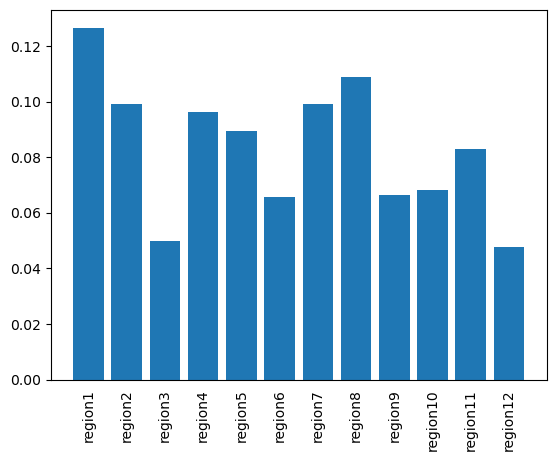

In [6]:
important_features = model.feature_importances_
plt.bar(range(len(important_features)),important_features)
plt.xticks(range(len(important_features)), x_train.columns, rotation=90)
plt.tick_params(axis='x', which='both', bottom=False, top=False)

In [7]:
clusters=[]
for i in range(1,10):
    clusters.append(mpimg.imread(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\Rishi Cluster Images\Cluster {i}.png"))
    

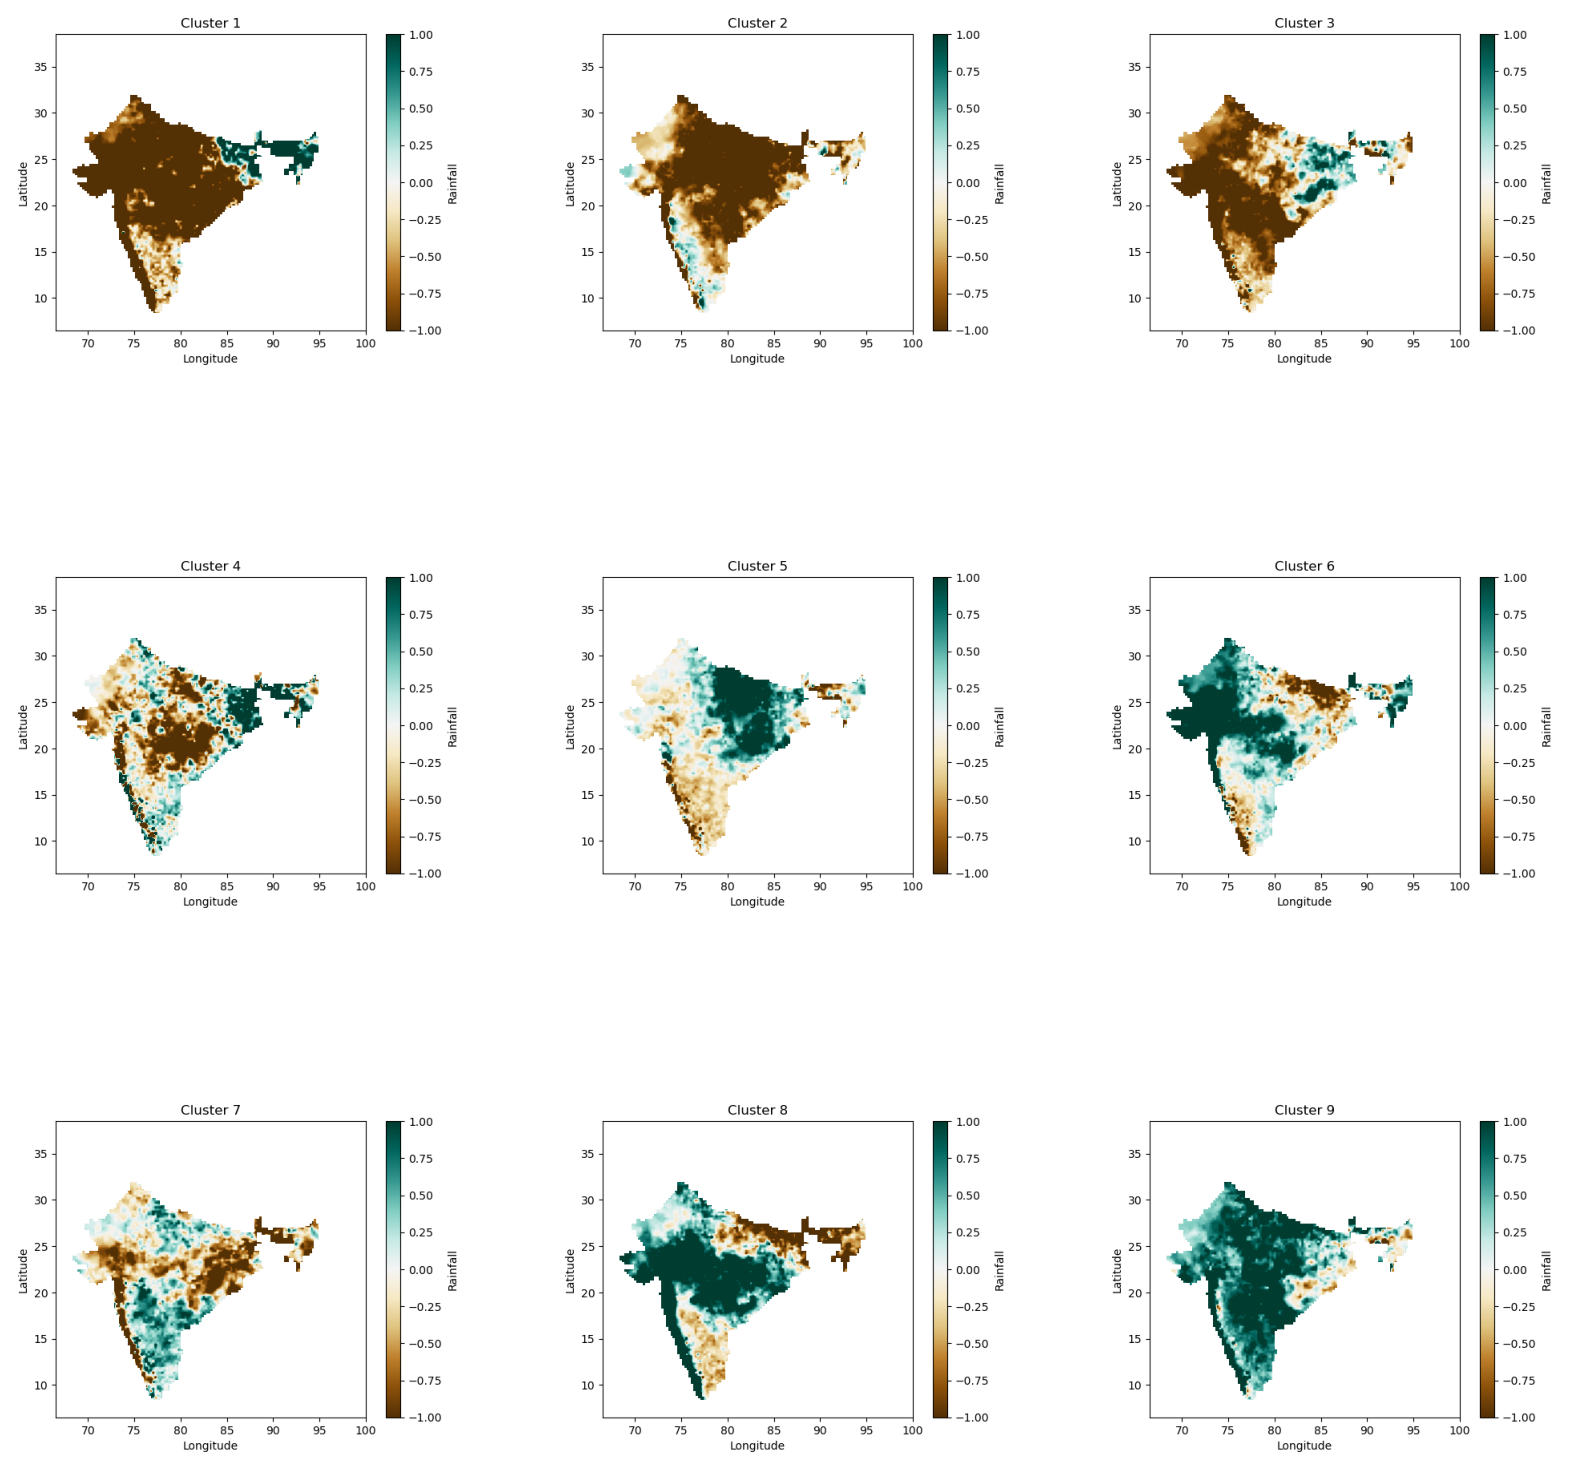

In [36]:
fig, axes = plt.subplots(3, 3, figsize=(20, 20))

for i, ax in enumerate(axes.ravel()):
    if i < len(clusters):
        ax.imshow(clusters[i])
        ax.axis('off')

In [37]:
actual_years_map=[]
year=2011
for i in range(12):
    actual_years_map.append(mpimg.imread(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\Rainfall Anomaly Images\\{year} Rainfall.png"))
    year+=1
                        

In [10]:
y_train

Cluster Number
0                 1
1                 3
2                 6
3                 2
4                 2
..              ...
105               7
106               7
107               4
108               1
109               5

[110 rows x 1 columns]

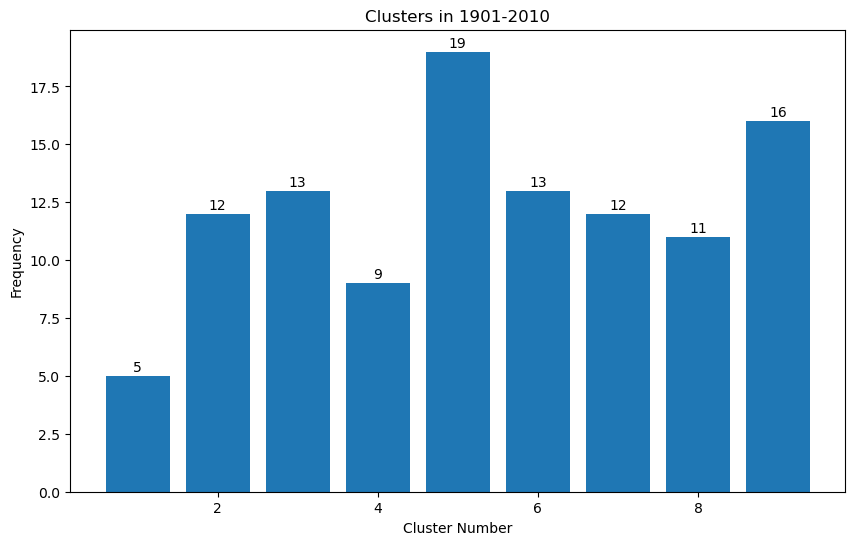

In [14]:
cluster_counts = y_train['Cluster Number'].value_counts().sort_index()

# Create a new Series with incremented index values
updated_index = cluster_counts.index + 1

# Create a new Series with the updated index values and the same data
cluster_counts = pd.Series(cluster_counts.values, index=updated_index, name="Cluster Number")


plt.figure(figsize=(10, 6))
bars1=plt.bar(cluster_counts.index, cluster_counts.values)
plt.title("Clusters in 1901-2010")
plt.xlabel("Cluster Number")
plt.ylabel("Frequency")
for bar, freq in zip(bars1, cluster_counts.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.2, str(freq), ha='center')

#plt.savefig('Clusters in 1901-2010.png')

In [38]:
cluster_counts

1     5
2    12
3    13
4     9
5    19
6    13
7    12
8    11
9    16
Name: Cluster Number, dtype: int64

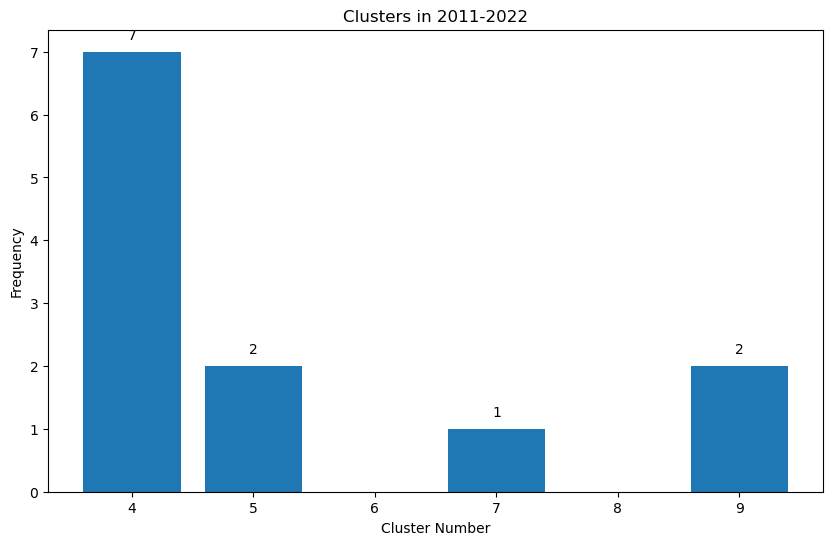

In [20]:
unique_values, value_counts = np.unique(y_pred, return_counts=True)
for i in range(len(unique_values)):
    unique_values[i]=unique_values[i]+1
    
plt.figure(figsize=(10, 6))  # Set the figure size
bars=plt.bar(unique_values, value_counts)
plt.title("Clusters in 2011-2022")
plt.xlabel("Cluster Number")
plt.ylabel("Frequency")

for bar, freq in zip(bars, value_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.2, str(freq), ha='center')
#plt.savefig('Clusters in 2011-2022.png')


In [39]:
y_pred

array([5, 2, 7, 2, 2, 1, 3, 1, 1, 1, 1, 1], dtype=int64)

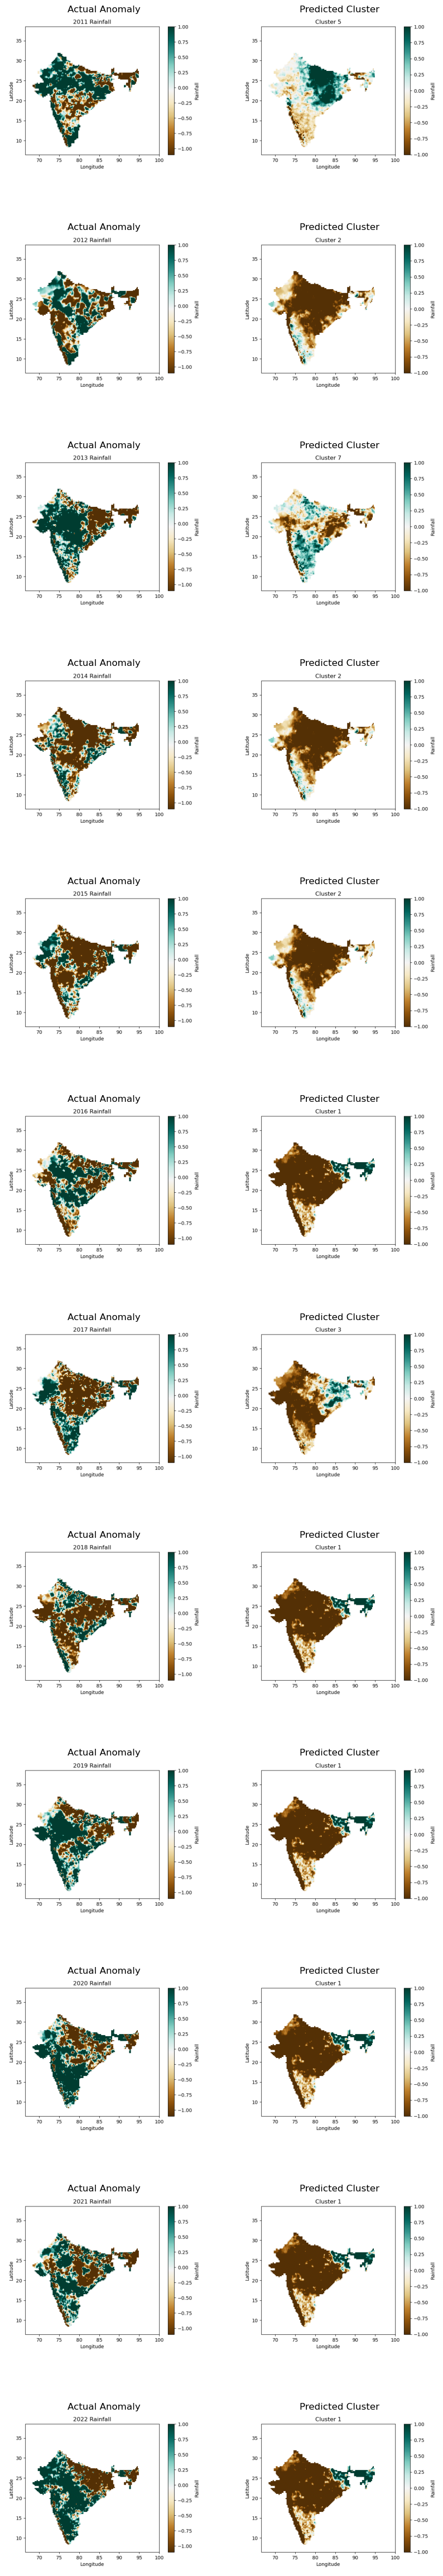

In [13]:
fig, axes = plt.subplots(12, 2, figsize=(10, 60)) 
j=0
for i, ax in enumerate(axes.ravel()):
    
    if((i+1)%2==0):
        pred_clus=y_pred[j]
        ax.imshow(clusters[pred_clus-1])
        ax.axis('off')
        ax.set_title(f'Predicted Cluster')
        j+=1
    elif((i+1)%2==1):
        ax.imshow(actual_years_map[j])
        ax.axis('off')
        ax.set_title('Actual Anomaly')


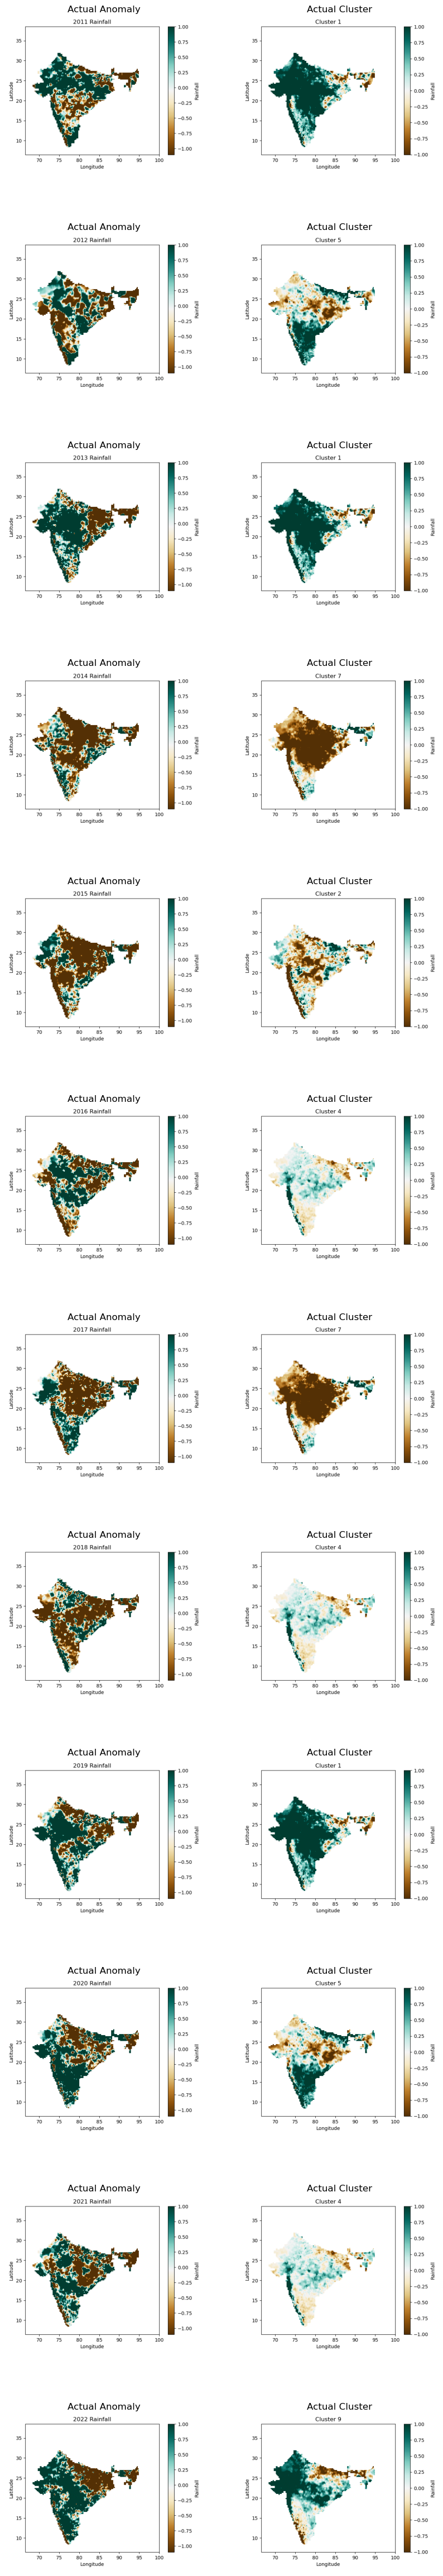

In [259]:
#Actual Years
fig, axes = plt.subplots(12, 2, figsize=(10, 60)) 
j=0
for i, ax in enumerate(axes.ravel()):
    
    if((i+1)%2==0):
        pred_clus=y_array[j]
        ax.imshow(clusters[pred_clus])
        ax.axis('off')
        ax.set_title(f'Actual Cluster')
        j+=1
    elif((i+1)%2==1):
        ax.imshow(actual_years_map[j])
        ax.axis('off')
        ax.set_title('Actual Anomaly')

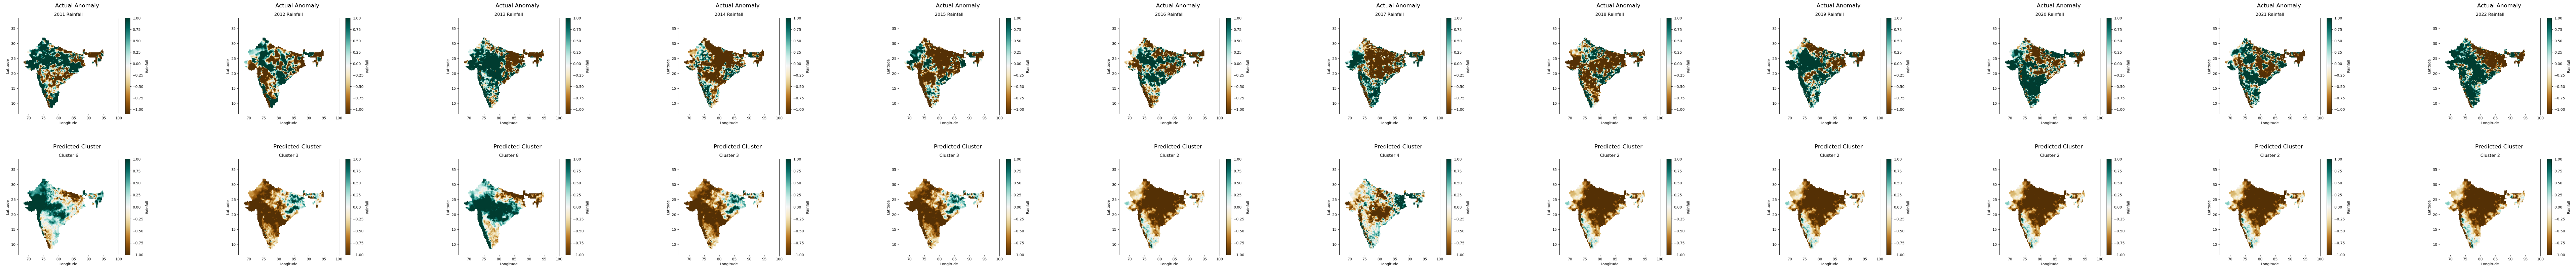

In [40]:
# fig, axes = plt.subplots(2, 12, figsize=(100, 10)) 
# j=0
# k=0
# for i, ax in enumerate(axes.ravel()):
    
#     if(i>=12):
#         pred_clus=y_pred[k]
#         ax.imshow(clusters[pred_clus])
#         ax.axis('off')
#         ax.set_title(f'Predicted Cluster')
#         k+=1
#     else:
#         ax.imshow(actual_years_map[j])
#         ax.axis('off')
#         ax.set_title('Actual Anomaly')
#         j+=1

# plt.savefig('Rishi Prediction.png')


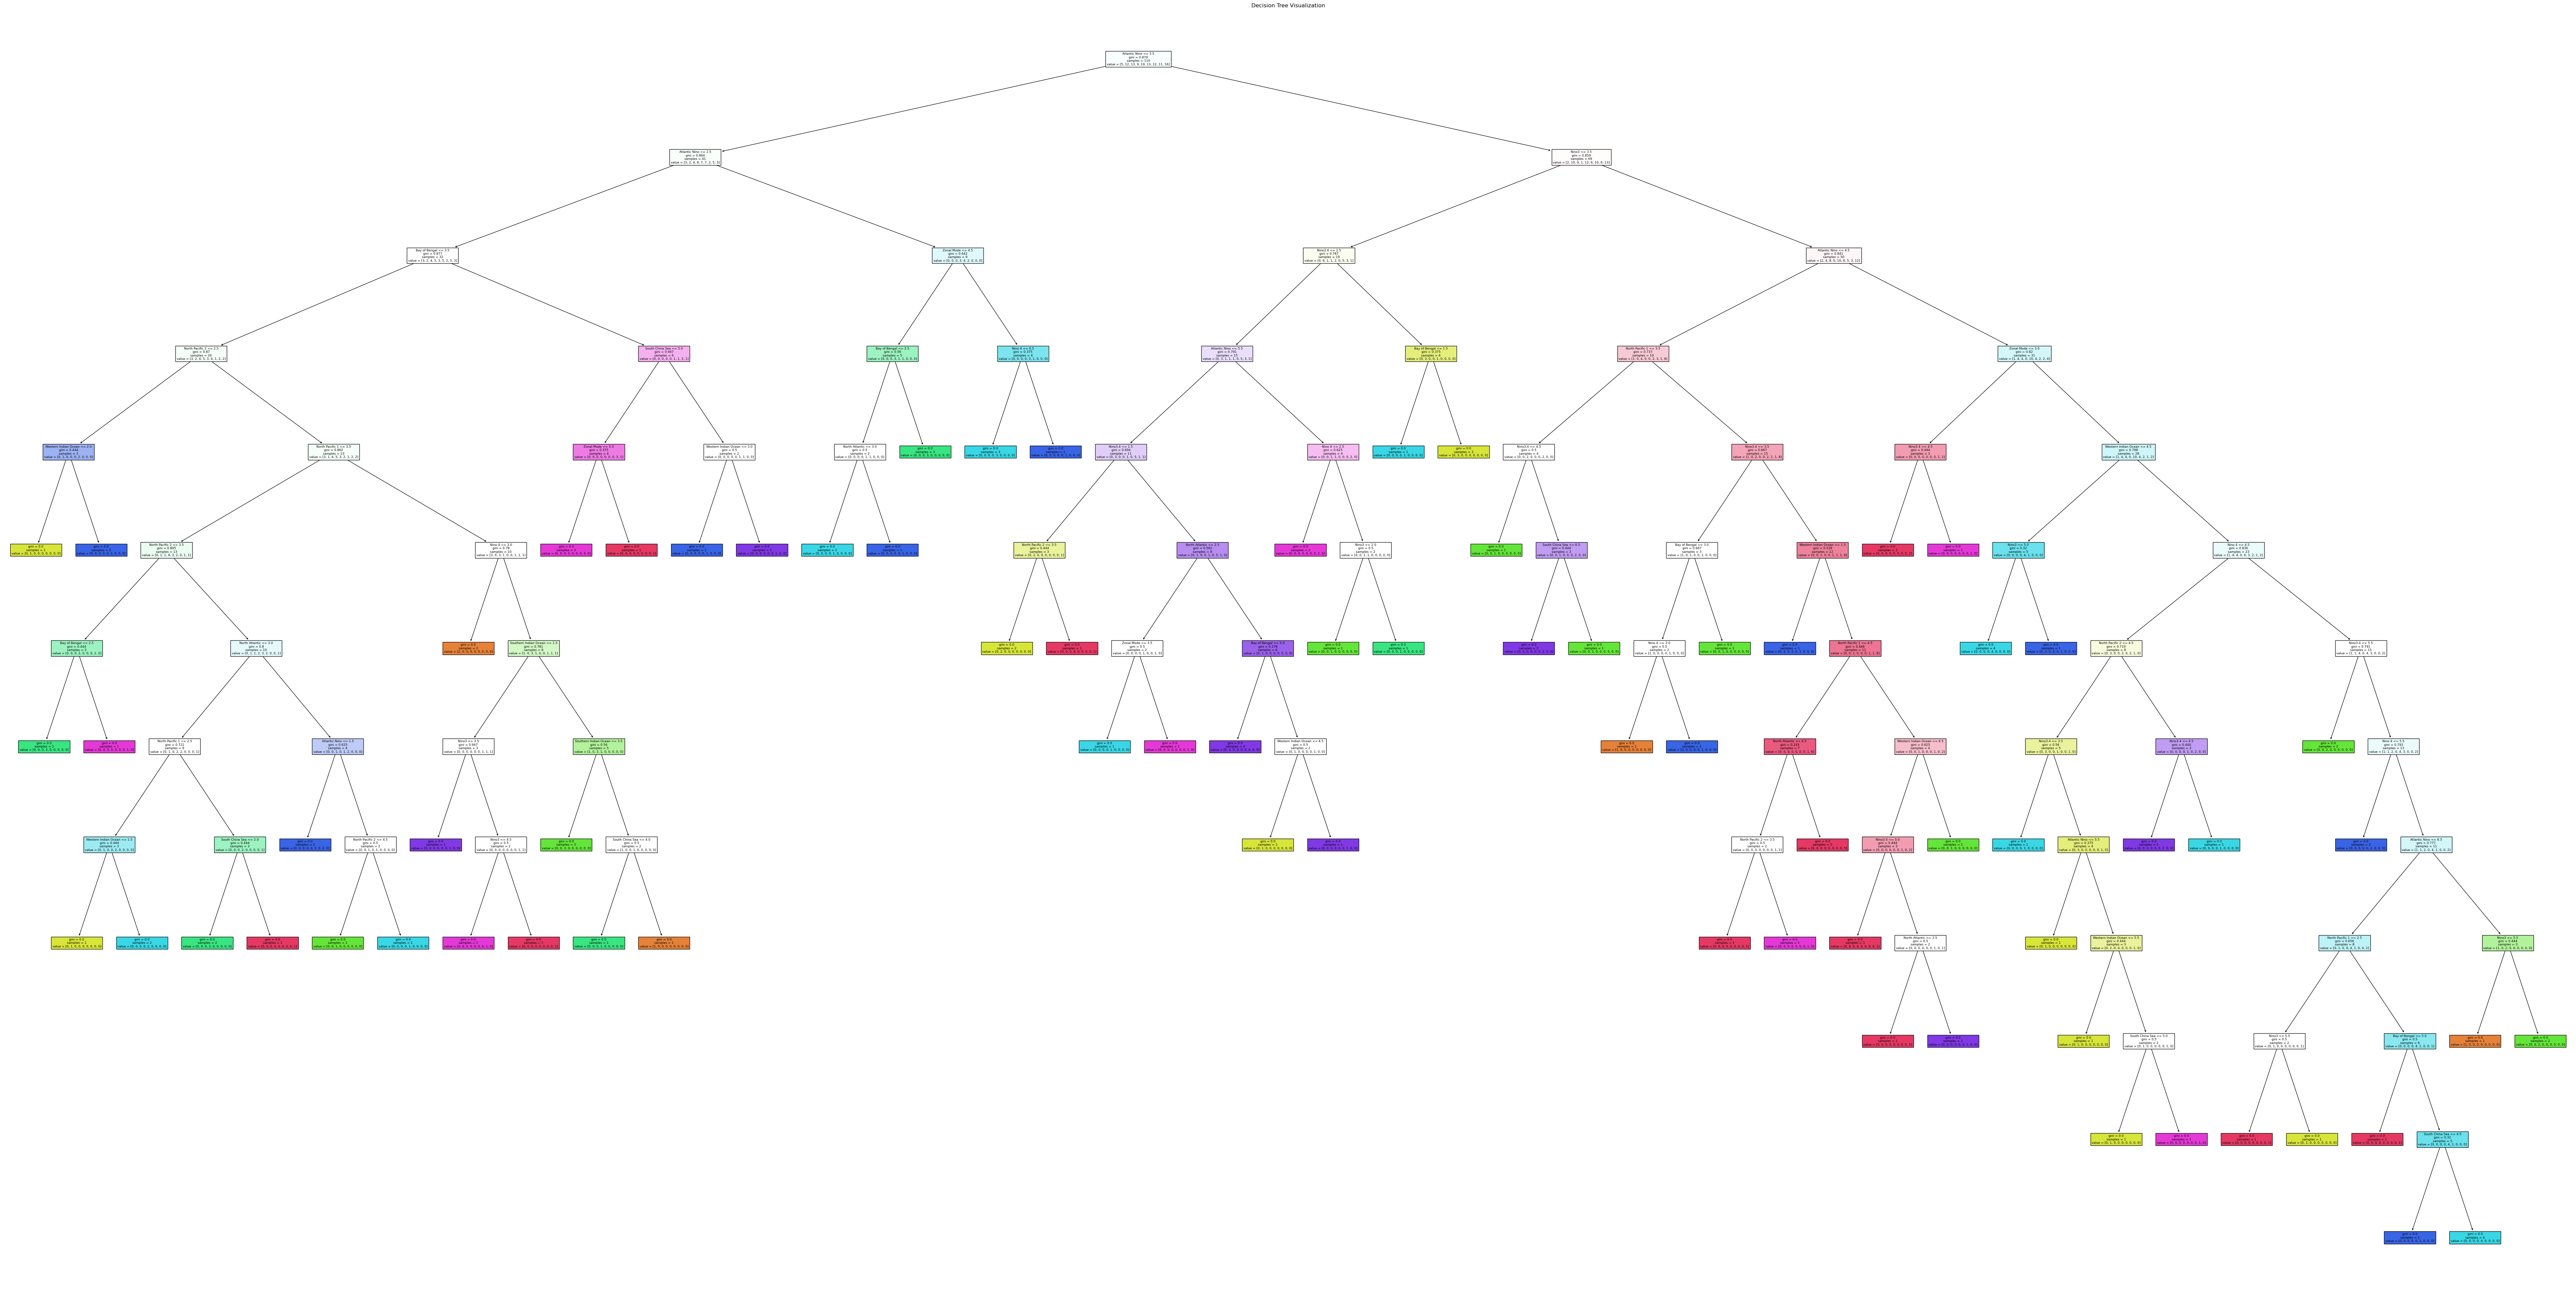

In [39]:
# Assuming you've already trained your Decision Tree classifier (clf)

cols=['Atlantic Nino', 'Bay of Bengal', 'Zonal Mode', 'Nino3', 'Nino3.4', 'Nino 4', 'North Atlantic', 'North Pacific 1', 'North Pacific 2', 'South China Sea', 'Southern Indian Ocean', 'Western Indian Ocean']


plt.figure(figsize=(100, 50))
tree.plot_tree(model, filled=True, feature_names=cols)
plt.title("Decision Tree Visualization")
#plt.savefig(f'CART.png', dpi=100, bbox_inches='tight')

plt.show()


In [3]:
x_train

region1  region2  region3  region4  region5  region6  region7  region8  \
0          6        7        6        6        5        4        5        5   
1          7        7        7        3        3        4        6        6   
2          7        6        7        5        4        3        7        6   
3          7        7        7        6        6        6        6        4   
4          7        7        7        2        2        4        6        7   
..       ...      ...      ...      ...      ...      ...      ...      ...   
105        2        1        2        4        4        4        2        4   
106        3        4        1        5        4        2        2        4   
107        2        3        5        5        6        6        1        3   
108        1        1        1        4        4        4        2        2   
109        1        1        1        3        2        2        4        3   

     region9  region10  region11  region12  
0          4         7         6         6  
1          5         6         7         7  
2          6         4         7         7  
3          7         7         7         7  
4          6         7         7         7  
..       ...       ...       ...       ...  
105        4         2         2         2  
106        5         3         1         1  
107        5         6         4         5  
108        4         2         1         2  
109        4         1         1         1  

[110 rows x 12 columns]

In [188]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
x_train_mean = x_train.mean(axis=1)
x_train_mean

0      5.166667
1      5.333333
2      5.416667
3      6.333333
4      5.416667
5      5.000000
6      5.583333
7      6.250000
8      6.166667
9      6.250000
10     6.416667
11     4.333333
12     5.500000
13     4.583333
14     3.416667
15     5.500000
16     6.000000
17     5.916667
18     4.500000
19     4.000000
20     5.250000
21     5.166667
22     5.083333
23     4.500000
24     5.500000
25     3.500000
26     5.333333
27     5.083333
28     5.416667
29     4.916667
30     3.166667
31     5.250000
32     5.166667
33     5.333333
34     5.083333
35     4.500000
36     3.916667
37     5.083333
38     5.000000
39     3.750000
40     2.333333
41     3.333333
42     5.500000
43     3.333333
44     3.500000
45     3.833333
46     4.083333
47     5.000000
48     4.750000
49     5.083333
50     4.583333
51     3.416667
52     3.250000
53     4.333333
54     5.500000
55     5.083333
56     3.666667
57     3.416667
58     3.666667
59     3.750000
60     3.750000
61     3.916667
62     4

In [189]:
x_test_mean=x_test.mean(axis=1)
x_test_mean

0     3.083333
1     2.666667
2     2.333333
3     1.833333
4     1.333333
5     1.416667
6     1.750000
7     1.750000
8     1.500000
9     1.416667
10    2.416667
11    2.416667
dtype: float64